<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Gasussian-process-and-early-stopping" data-toc-modified-id="Gasussian-process-and-early-stopping-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Gasussian process and early stopping</a></span></li></ul></div>

## Gasussian process and early stopping

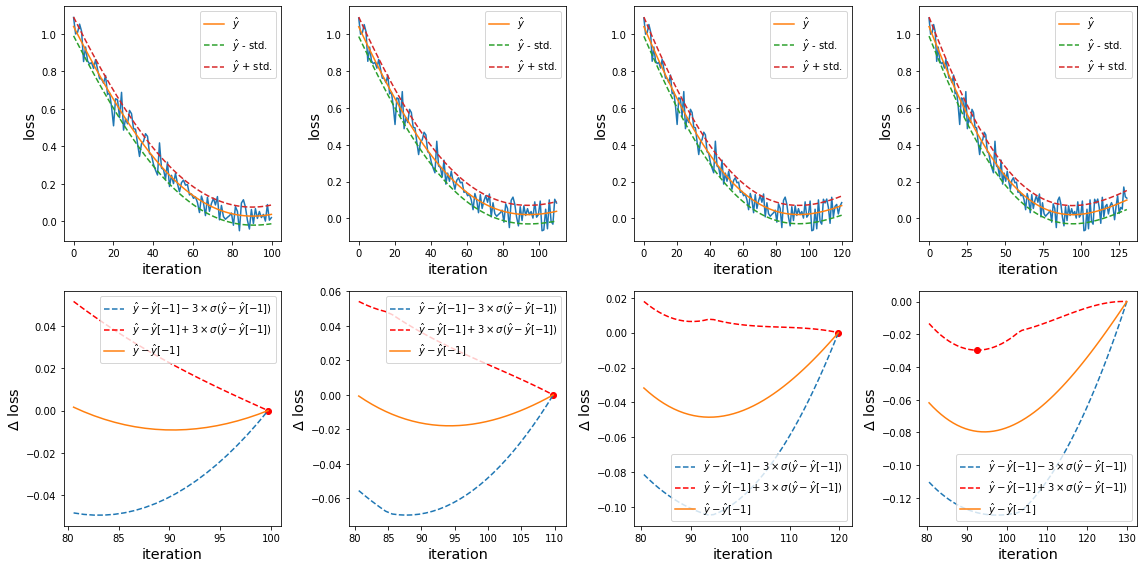

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import   GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel
from sklearn.gaussian_process.kernels import RBF
%matplotlib inline

def plot():
    
    
    np.random.seed(0)
    Xs=np.linspace(0, 140, 140)
    ys = (1/100)**2 *(Xs-100)**2 + 0.05*np.random.randn(140)
    
    fig, axes = plt.subplots(2,4, figsize=(16,8))    
    
    for i in range(4):

        ax1 = axes[0, i]
        ax2 = axes[1, i]
        end = 100 + 10*i
        X = Xs[:end].reshape(-1,1)
        y = ys[:end]


        gpr=GaussianProcessRegressor(kernel=WhiteKernel(0.1) + 0.1*RBF(100))
        gpr.fit(X, y)

        yhat,std = gpr.predict(X, return_std=True)
        ax1.plot(X, y)
        ax1.plot(X, yhat, label=r"$\hat{y}$")
        ax1.plot(X, yhat - std, label=r"$\hat{y}$ - std.", linestyle="--")
        ax1.plot(X, yhat + std, label=r"$\hat{y}$ + std.", linestyle="--")
        ax1.set_xlabel("iteration", fontsize="x-large")
        ax1.set_ylabel("loss", fontsize="x-large")
        ax1.legend()


        yhat, cov = gpr.predict(X, return_cov=True)
        sigma=np.zeros(len(yhat))

        cov -= np.eye(len(yhat))*gpr.kernel_.get_params()["k1__noise_level"]
        ref=-1
        for i in range(len(sigma)):
            sigma [i]= np.sqrt(np.abs(  cov[i,i] + cov[ref,ref] - 2*np.sqrt(cov[i,ref]*cov[i,ref]) ) )
            #sigma [i]= np.sqrt(np.abs(  cov[i,i] ))

        y_mid = yhat - yhat[-1]
        y_m = yhat - yhat[-1] - 3*sigma
        y_p = yhat - yhat[-1] + 3*sigma
        start=80
        
        xmin = X[np.argmin(y_p)]
        ymin = y_p[np.argmin(y_p)]
        
        ax2.plot(X[start:], y_m[start:], label=r"$\hat{y} - \hat{y}[-1]  - 3\times\sigma(\hat{y}- \hat{y}[-1]) $", linestyle="--")
        ax2.plot(X[start:], y_p[start:], label=r"$\hat{y} - \hat{y}[-1]  + 3\times\sigma(\hat{y}- \hat{y}[-1]) $",color="r", linestyle="--")
        ax2.plot(X[start:], y_mid[start:], label=r"$\hat{y} - \hat{y}[-1]$")
        ax2.scatter([xmin], [ymin], color="r")

        ax2.set_xlabel("iteration", fontsize="x-large")
        ax2.set_ylabel(r"$\Delta$ loss", fontsize="x-large")
        ax2.legend()
        
    plt.tight_layout()

plot()